# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

## Motivation Problem - *Pizza Parlour Study*

**Problem Statement** Given the list of locations of customers who frequently order Pizza we want to find out optimal locations of Pizza Parlours where they should be opened.

<img src="pizza1.png" alt="Pizza-1" style="width: 400px;"/>

**Step-1** : Initialise Pizza Parlour Centers randomly.
<img src="pizza2.png" alt="Pizza-2" style="width: 400px;"/>

**Step-2** : Assign each customer to its nearest Pizza Center.
<img src="pizza3.png" alt="Pizza-3" style="width: 400px;"/>

**Step-3** : Update the Center Location by taking mean of customers assigned to it.
<img src="pizza4.png" alt="Pizza-4" style="width: 400px;"/>

**Step-4** : Repeat Steps 2 and 3 Until Convergence.
<img src="pizza5.png" alt="Pizza-5" style="width: 400px;"/>

## K-Means Algorithm

**Input Data** : X = {x1,...,xN}

**Goal** : Partition the data among some K number of clusters. Let us assume K is known to us.

Let µk denote the center of Kth Cluster (uk will be vector)

So we need to ﬁnd an assignment of data points to clusters,
as well as a set of cluster centers{µk}, such that the sum of the squares 
of the distances of each data point to its closest cluster center µk, is a minimum. 




<img src="k-means.png" alt="Pizza-1" style="width: 600px;"/>


## Implementation



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [10]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)

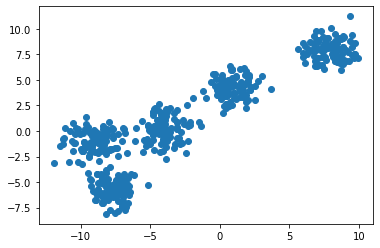

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Goal : 

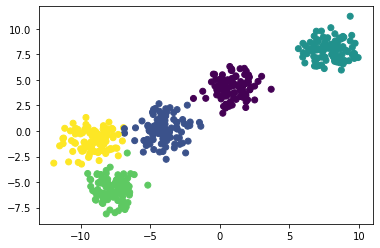

In [12]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

### Algorithm

#### Step 1 - Initilize cluster centers

In [209]:
# prior knowledge
k = 5

color = ['green', 'yellow', 'blue', 'orange', 'red']

clusters = {}

for i in range(k):
    # initialize center location for C<i> Cluster.
    center = np.random.uniform(low = -8, high = 8, size = 2)
    points = []
    
    cluster = {
        "center": center,
        "points": points,
        "color": color[i]
    }
    
    clusters[i] = cluster

In [210]:
clusters

{0: {'center': array([4.88837803, 3.92875574]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-7.97227385,  0.08682083]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([ 1.7641637 , -2.75144876]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-1.80446655, -5.87089496]),
  'points': [],
  'color': 'orange'},
 4: {'center': array([ 1.02089819, -5.94672108]),
  'points': [],
  'color': 'red'}}

#### Step 2 - Assign Data points

In [211]:
def distance(v1, v2):
    return np.sum((v1-v2)**2)**0.5

In [212]:
# asssign each data point to its nearest cluster.
def assignPointsToCluster():
    for i in range(X.shape[0]):
        dist = []
        
        for c in range(k):
            d = distance(X[i], clusters[c]['center'] )
            dist.append(d)
            
        nearest_cluster = np.argmin(dist)
        clusters[nearest_cluster]['points'].append(X[i])

In [213]:
def plotClusters():
    for cx in range(k):
        pts = np.array(clusters[cx]['points'])
        custer_color = clusters[cx]['color']
        
        try:
            plt.scatter(pts[:,0], pts[:, 1], c=custer_color)
        except:
            pass
        
        cluster_center = np.array(clusters[cx]['center'])
        
        plt.scatter(cluster_center[0], cluster_center[1], c='black', s= 300, marker="*" )
        
    plt.show()

#### Step -3  : Update Cluster

In [214]:
def updateClusters():
    for cx in range(k):
        pts = np.array(clusters[cx]['points'])
        
        if len(pts)> 0:
            new_mean = np.mean(pts, axis =0)

            clusters[cx]['center'] = new_mean
            clusters[cx]['points'] = []
        

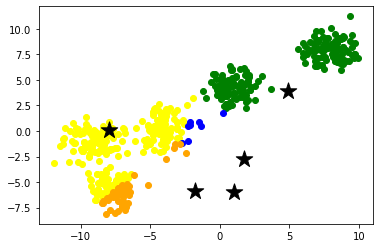

In [215]:
updateClusters()
assignPointsToCluster()
plotClusters()

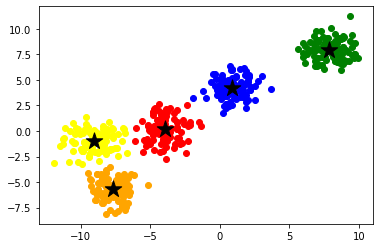

In [227]:
updateClusters()
assignPointsToCluster()
plotClusters()

In [229]:
for c in range(k):
    print(clusters[c]['center'])

[7.8649674  7.97988109]
[-9.0671623  -0.96740759]
[0.88641907 4.19441853]
[-7.6726196  -5.69211059]
[-3.97953526  0.19458336]
